## This is a dataset of UK-based B2C e-commerce sales transactions for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.


#### https://www.kaggle.com/gabrielramos87/an-online-shop-business


#### Imported the necessary libraries using import + the name of the library. Abbreviation is possible when calling the libraries using as +  the acronym to your liking, in this case I chose agreed acronyms which are widely extended

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

#### Read the dataframe and assigning it to a variable.

#### Basic exploratory data analysis. Info() to check column names and their dtypes, if there are NaN values, describe() the mean price comprising all transactions is 13, quantity 9; max and min price and quantity etc. shape() will output number of rows and columns and size() number of fields

In [2]:
df = pd.read_csv('Desktop/Business Sales Transaction.csv')
display(df.info(),df.describe(),df.shape,df.size,df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   Revenue        536350 non-null  float64
 7   CustomerNo     536295 non-null  float64
 8   Country        536350 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 36.8+ MB


None

,Price,Quantity,Revenue,CustomerNo
count,536350.000000,536350.000000,5.363500e+05,536295.000000
mean,13.607106,9.919347,1.203618e+02,15227.893178
std,4.604897,216.662300,2.574805e+03,1716.582932
min,10.250000,-80995.000000,-1.002718e+06,12004.000000
25%,11.530000,1.000000,1.875000e+01,13807.000000
50%,12.380000,3.000000,4.604000e+01,15152.000000
75%,14.480000,10.000000,1.278000e+02,16729.000000
max,675.990000,80995.000000,1.002718e+06,18287.000000


(536350, 9)

4827150

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country
0,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,383.40,13069.0,United Kingdom
1,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,138.36,13069.0,United Kingdom
2,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,127.80,13069.0,United Kingdom


#### The exploratory analysis above tossed a few NaN in the data. Let's sanity check

In [3]:
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
Revenue           0
CustomerNo       55
Country           0
dtype: int64

In [4]:
df[df['CustomerNo'].isnull()].head(5)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country
6543,C581406,12/8/2019,46000M,Polyester Filler Pad 45x45cm,10.25,-240,-2460.00,NaN,United Kingdom
6544,C581406,12/8/2019,46000S,Polyester Filler Pad 40x40cm,10.25,-300,-3075.00,NaN,United Kingdom
94145,C575153,11/8/2019,22947,Wooden Advent Calendar Red,44.25,-1,-44.25,NaN,United Kingdom
105033,C574288,11/3/2019,22178,Victorian Glass Hanging T-Light,25.37,-1,-25.37,NaN,United Kingdom
117279,C573180,10/28/2019,23048,Set Of 10 Lanterns Fairy Light Star,14.50,-1,-14.50,NaN,United Kingdom


#### Come to the conclusion that for some reason, CustomerNo is not recorded in the data when there is a cancellation. Cancellation whose TransactionNo begins with C and negative quantity and revenue. I checked and some of the CustomerNo do have CustomerNo.

#### The way to go about collecting the missing CustomerNo is to check if there is TransactionNo duplicates in the column once you first remove the C at the beginning. 

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### In the exploratory analysis above, we see that the Date column is being treated as a type object which is obviously an issue that will get into our way in subsequent data analysis. 

#### Having done that, we will start adding some new columns to the dataset, all related to date. Month, month_year, week, quarter are time series that we want to have for further analysis

In [5]:
df.Date = pd.to_datetime(df.Date).dt.date


In [6]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')
df['week'] = pd.to_datetime(df['Date']).dt.to_period('W')
df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
df.head(3)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country,month,month_year,week,quarter
0,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,383.40,13069.0,United Kingdom,12,2019-12,2019-12-09/2019-12-15,4
1,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,138.36,13069.0,United Kingdom,12,2019-12,2019-12-09/2019-12-15,4
2,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,127.80,13069.0,United Kingdom,12,2019-12,2019-12-09/2019-12-15,4


In [7]:
df = df.sort_values('Date')
df.reset_index(drop=True,inplace=True)


#### Created aditional column Cancellations to look into most frequently returned products, max,min, time which most cancellations where made, visualization etc.

#### I used the lambda function which in this case I believe it is the most efficient, however I tried to use np.where(df['Revenue']<0,1,0) in my first attempt

In [8]:
df['Cancellation'] = df['Revenue'].apply(lambda x: '1' if x < 0 else '0')
df.tail(3)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country,month,month_year,week,quarter,Cancellation
536347,581492,2019-12-09,22489,Pack Of 12 Traditional Crayons,11.10,5,55.50,15492.0,United Kingdom,12,2019-12,2019-12-09/2019-12-15,4,0
536348,581492,2019-12-09,22437,Set Of 9 Black Skull Balloons,11.92,1,11.92,15492.0,United Kingdom,12,2019-12,2019-12-09/2019-12-15,4,0
536349,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,383.40,13069.0,United Kingdom,12,2019-12,2019-12-09/2019-12-15,4,0


#### Outliers detection analysis enables us to visually display how much the usual revenue of the company is as well as stablishing a treshold in terms of what the company would consider a very successful day and what would not. Will also serve to set KPI's potentially. We can see that the company´s range of daily revenue that would be considered normal would stick between 280000 aand 15000  

#### We can extrapolate similar conclusions to the quantity boxplot

,Quantity,Revenue
Date,,
2019-05-12,37626,446872.52
2019-08-04,38806,459494.39
2019-08-11,38988,465898.02
2019-09-20,43551,557385.33
2019-10-05,45904,545888.51
2019-10-20,40787,480070.40
2019-11-10,38034,459674.31
2019-11-14,47125,596443.07
2019-11-23,39148,478558.98


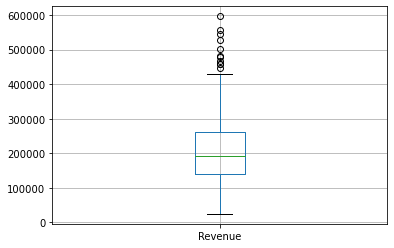

In [89]:
outliers_hist= df.groupby('Date').agg({'Quantity': 'sum','Revenue': 'sum'})
outliers_hist.boxplot(column='Revenue', return_type='axes') 
outliers_hist[outliers_hist['Revenue']>430000]

<AxesSubplot:>

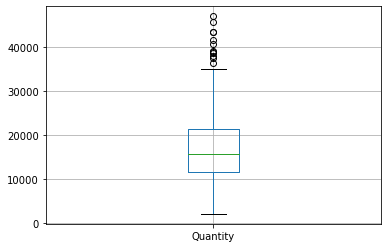

In [78]:
outliers_hist.boxplot(column='Quantity', return_type='axes') 

In [90]:
df.corr()

,Price,Quantity,Revenue,CustomerNo,month,quarter
Price,1.000000,-0.014645,-0.006465,-0.018302,-0.014637,-0.019742
Quantity,-0.014645,1.000000,0.998522,-0.002232,-0.001395,-0.001523
Revenue,-0.006465,0.998522,1.000000,-0.002131,-0.001236,-0.001421
CustomerNo,-0.018302,-0.002232,-0.002131,1.000000,0.027059,0.026408
month,-0.014637,-0.001395,-0.001236,0.027059,1.000000,0.972986
quarter,-0.019742,-0.001523,-0.001421,0.026408,0.972986,1.000000


## Country & Region Analysis

### The Global Operations team of the company split up resposibilities into different regions accross the globe, appointing a Head of Regional Operations who is in charge of business development, strategy and management for each region. 

##### In order for the Global Operations team to track the performance of every region, reporting based on this parametre is crucial which leads to the need of mapping the data accordingly.

##### As you can see below, I defined a function whereby we mapped based on country column using IF statements. Thought about creating a dict where I would input the keys as well as values, in this case the name of every country e.g.  map({'Spain':'EMEA' and so on} however it was not ideal in terms of efficiency. Alternative to using if statement  for each EMEA country I should have defined 'Middle East and Others' for efficiency purposes, leaving all those EMEA countries within else statement.


In [10]:
df.Country.unique()

array(['Germany', 'United Kingdom', 'EIRE', 'Norway', 'Australia',
       'Netherlands', 'France', 'Belgium', 'Portugal', 'Italy',
       'Switzerland', 'Lithuania', 'Japan', 'Iceland', 'Spain', 'Denmark',
       'Israel', 'Unspecified', 'Cyprus', 'Sweden', 'Austria', 'Finland',
       'USA', 'Greece', 'Hong Kong', 'Singapore', 'Lebanon',
       'Channel Islands', 'Poland', 'United Arab Emirates',
       'Saudi Arabia', 'Czech Republic', 'Canada', 'Brazil',
       'European Community', 'Bahrain', 'Malta', 'RSA'], dtype=object)

In [11]:
def my_function_region(x):
    if x =='United Kingdom':
        return('UK')
    elif x=='Germany' or x=='EIRE' or x=='Norway' or x=='Netherlands' or x=='France' or x=='Belgium' or x=='Portugal' or x=='Italy' or x=='Switzerland' or x=='Lithuania' or x=='Iceland' or x=='Spain' or x=='Denmark' or x == 'Cyprus' or x == 'Sweden' or x == 'Austria' or x == 'Finland' or x == 'Greece' or x == 'Poland' or x == 'Czech Republic' or x == 'Malta':
        return('EMEA')
    elif x == 'Japan' or x=='Hong Kong' or x=='Singapore' or x=='Bahrain':
        return('APAC')
    elif x==('USA') or x==('Canada') or x==('Brazil'):
        return('America')
    else:
        return('Middle East & Others')
df ['Region'] = df['Country'].map(my_function_region)
df.head(3)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country,month,month_year,week,quarter,Cancellation,Region
0,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,-65.40,12472.0,Germany,12,2018-12,2018-11-26/2018-12-02,4,1,EMEA
1,536522,2018-12-01,22151,Place Setting White Heart,10.68,1,10.68,15012.0,United Kingdom,12,2018-12,2018-11-26/2018-12-02,4,0,UK
2,536522,2018-12-01,21098,Christmas Toilet Roll,11.53,2,23.06,15012.0,United Kingdom,12,2018-12,2018-11-26/2018-12-02,4,0,UK


#### List of countries sorted by revenue ascending to descending order. Info delivered to Global Operations: business questions satisfied... who are the best and the worst countries in terms of sales in current year(until 9th Dec) + December previous Year

#### Business solutions to address: given that the revenue for some of the countries is drastically different relative to others, we can propose the creation of Tiers according to the size of business within the country. E.g. UK keeps the same designation because of its high volume, Tier 1:Netherlands, EIRE, Germany,France and Australia, Tier 2 (see list below) from Sweden to Channel Islands and so on and so forth. Benefits: one more reporting measure by Tiers, increase  competion between countries who belong to the same Tier

#### We can create the tiers the same way we did with the regions. Creating a function that will set the ranges based on which the countries will be tallied. Then use map() within the Revenue column and calling the function previously created

In [12]:
country_TRevenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
country_TRevenue

Country
United Kingdom          53663061.61
Netherlands              2345885.09
EIRE                     1729070.71
Germany                  1431720.71
France                   1413964.94
Australia                1017220.27
Sweden                    398663.79
Switzerland               369496.46
Japan                     295304.33
Belgium                   285150.75
Spain                     271081.70
Norway                    204490.51
Portugal                  200772.57
Finland                   128394.73
Denmark                   106623.89
Channel Islands           103706.16
Italy                      83431.20
Austria                    69981.81
Singapore                  62992.87
Cyprus                     60778.96
Israel                     55445.44
Iceland                    50120.98
Unspecified                32879.03
Canada                     31505.81
Hong Kong                  28432.50
USA                        20281.56
Poland                     19753.30
Malta               

#### Created different datasets out of the main one to report country revenue based on month_year. This has only been done for the TOP5. As you can see below I went about this by groupingby month_year,Country then aggregated the Revenue. <span style='color:Blue'> The fact that this is a very manual process makes me think there is a more efficient workaround possibly through a loop within a function  </span>

In [13]:
country_list = df.groupby(['month_year','Country'])['Revenue'].sum().sort_values(ascending=False)
country_list= pd.DataFrame(country_list)
country_list = country_list.reset_index()
uk = country_list[country_list['Country']=='United Kingdom']
uk = uk.set_index('month_year').sort_index()
France = country_list[country_list['Country']=='France']
France = France.set_index('month_year').sort_index()
Netherlands = country_list[country_list['Country']=='Netherlands']
Netherlands  = Netherlands.set_index('month_year').sort_index()
EIRE = country_list[country_list['Country']=='EIRE']
EIRE  = EIRE.set_index('month_year').sort_index()
Germany = country_list[country_list['Country']=='Germany']
Germany  = Germany.set_index('month_year').sort_index()
display(uk,France,Netherlands,EIRE,Germany)

,Country,Revenue
month_year,,
2018-12,United Kingdom,3695532.68
2019-01,United Kingdom,2845542.99
2019-02,United Kingdom,2779460.16
2019-03,United Kingdom,3699927.70
2019-04,United Kingdom,3139556.65
2019-05,United Kingdom,3881932.52
2019-06,United Kingdom,3707249.48
2019-07,United Kingdom,3966697.74
2019-08,United Kingdom,3917795.21


,Country,Revenue
month_year,,
2018-12,France,93649.99
2019-01,France,122814.79
2019-02,France,65667.14
2019-03,France,101942.44
2019-04,France,26502.10
2019-05,France,121979.02
2019-06,France,110845.31
2019-07,France,70380.44
2019-08,France,93621.56


,Country,Revenue
month_year,,
2018-12,Netherlands,78772.44
2019-01,Netherlands,236542.10
2019-02,Netherlands,190976.23
2019-03,Netherlands,174612.25
2019-04,Netherlands,21018.68
2019-05,Netherlands,233862.10
2019-06,Netherlands,229598.26
2019-07,Netherlands,103.54
2019-08,Netherlands,344250.79


,Country,Revenue
month_year,,
2018-12,EIRE,73555.09
2019-01,EIRE,113854.41
2019-02,EIRE,52143.75
2019-03,EIRE,115083.51
2019-04,EIRE,58228.32
2019-05,EIRE,106627.45
2019-06,EIRE,144579.59
2019-07,EIRE,266441.61
2019-08,EIRE,86365.28


,Country,Revenue
month_year,,
2018-12,Germany,99445.88
2019-01,Germany,125218.94
2019-02,Germany,55078.48
2019-03,Germany,90556.39
2019-04,Germany,68567.76
2019-05,Germany,158403.20
2019-06,Germany,87889.93
2019-07,Germany,101234.38
2019-08,Germany,110791.72


#### Calculated the monthly revenue for all countries except the Top 5

In [14]:
indexes = country_list[(country_list['Country'] == 'United Kingdom') | (country_list['Country'] == 'Netherlands') | (country_list['Country'] == 'EIRE') | (country_list['Country'] == 'France') | (country_list['Country'] == 'Germany')].index
month_purchases_all_countries_ex_TOP5 = country_list.drop(indexes)
month_purchases_all_countries_ex_TOP5.set_index('month_year').sort_index()
month_purchases_all_countries_ex_TOP5 = month_purchases_all_countries_ex_TOP5.groupby('month_year')['Revenue'].sum()
month_purchases_all_countries_ex_TOP5


month_year
2018-12    253015.11
2019-01    301756.12
2019-02    245175.45
2019-03    353983.99
2019-04    202256.07
2019-05    257191.45
2019-06    383321.36
2019-07    330331.69
2019-08    368152.53
2019-09    317347.93
2019-10    467677.18
2019-11    413131.39
2019-12     78996.57
Freq: M, Name: Revenue, dtype: float64

#### created different datasets for visualization purposes, month_purchases = Monthly Total Revenue, merged =dataset merging the datasets created above for the TOP5 as well as the total. <span style='color:Blue'> There must be a more efficient and intuitive method to merge multiple datasets together and the process seem quite convoluted  </span>

In [15]:
month_purchases = df.groupby('month_year')['Revenue'].sum()
merged = uk.merge(month_purchases, left_index=True, right_index=True, how='inner').merge(France, left_index=True, right_index=True, how='inner').merge(Netherlands, left_index=True, right_index=True, how='inner').merge(EIRE, left_index=True, right_index=True, how='inner').merge(Germany, left_index=True, right_index=True, how='inner')
merged.columns.values[1] = "UK"
merged.columns.values[2] = "Total"
merged.columns.values[4] = "France"
merged.columns.values[6] = "Netherlands"
merged.columns.values[8] = "EIRE"
merged.columns.values[10] = "Germany"
merged = merged.drop(merged['Country_x'],axis=1)
merged = merged.drop(merged['Country_y'],axis=1)
merged.__delitem__('Country')

uk_top5_total= merged.copy()
uk_top5_total['SUM TOP5 ex.UK'] = uk_top5_total.iloc[:,2:6].sum(axis=1)
uk_top5_total = uk_top5_total.drop(uk_top5_total.iloc[:,2:6],axis=1)
uk_top5_rest_total= uk_top5_total.merge(month_purchases_all_countries_ex_TOP5, left_index=True, right_index=True, how='inner')
uk_top5_rest_total.columns.values[3] = "Rest of the Countries"

Total_uk_restcountries = uk_top5_rest_total.copy()
Total_uk_restcountries['Rest of Countries ex.UK'] = Total_uk_restcountries.iloc[:,2:4].sum(axis=1)
Total_uk_restcountries.drop(Total_uk_restcountries.iloc[:,2:4],axis=1,inplace=True)

Top5_exUK = merged.copy()
Top5_exUK.drop(Top5_exUK.iloc[:,0:2],axis=1,inplace=True)

display(month_purchases,merged,uk_top5_total,Total_uk_restcountries,Top5_exUK)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Revenue_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(
C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Country_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


month_year
2018-12    4293971.19
2019-01    3745729.35
2019-02    3388501.21
2019-03    4536106.28
2019-04    3516129.58
2019-05    4759995.74
2019-06    4663483.93
2019-07    4735189.40
2019-08    4920977.09
2019-09    6807836.00
2019-10    7214205.62
2019-11    9173880.92
2019-12    2800033.59
Freq: M, Name: Revenue, dtype: float64

,UK,Total,France,Netherlands,EIRE,Germany
month_year,,,,,,
2018-12,3695532.68,4293971.19,93649.99,78772.44,73555.09,99445.88
2019-01,2845542.99,3745729.35,122814.79,236542.10,113854.41,125218.94
2019-02,2779460.16,3388501.21,65667.14,190976.23,52143.75,55078.48
2019-03,3699927.70,4536106.28,101942.44,174612.25,115083.51,90556.39
2019-04,3139556.65,3516129.58,26502.10,21018.68,58228.32,68567.76
2019-05,3881932.52,4759995.74,121979.02,233862.10,106627.45,158403.20
2019-06,3707249.48,4663483.93,110845.31,229598.26,144579.59,87889.93
2019-07,3966697.74,4735189.40,70380.44,103.54,266441.61,101234.38
2019-08,3917795.21,4920977.09,93621.56,344250.79,86365.28,110791.72


,UK,Total,SUM TOP5 ex.UK
month_year,,,
2018-12,3695532.68,4293971.19,345423.40
2019-01,2845542.99,3745729.35,598430.24
2019-02,2779460.16,3388501.21,363865.60
2019-03,3699927.70,4536106.28,482194.59
2019-04,3139556.65,3516129.58,174316.86
2019-05,3881932.52,4759995.74,620871.77
2019-06,3707249.48,4663483.93,572913.09
2019-07,3966697.74,4735189.40,438159.97
2019-08,3917795.21,4920977.09,635029.35


,UK,Total,Rest of Countries ex.UK
month_year,,,
2018-12,3695532.68,4293971.19,598438.51
2019-01,2845542.99,3745729.35,900186.36
2019-02,2779460.16,3388501.21,609041.05
2019-03,3699927.70,4536106.28,836178.58
2019-04,3139556.65,3516129.58,376572.93
2019-05,3881932.52,4759995.74,878063.22
2019-06,3707249.48,4663483.93,956234.45
2019-07,3966697.74,4735189.40,768491.66
2019-08,3917795.21,4920977.09,1003181.88


,France,Netherlands,EIRE,Germany
month_year,,,,
2018-12,93649.99,78772.44,73555.09,99445.88
2019-01,122814.79,236542.10,113854.41,125218.94
2019-02,65667.14,190976.23,52143.75,55078.48
2019-03,101942.44,174612.25,115083.51,90556.39
2019-04,26502.10,21018.68,58228.32,68567.76
2019-05,121979.02,233862.10,106627.45,158403.20
2019-06,110845.31,229598.26,144579.59,87889.93
2019-07,70380.44,103.54,266441.61,101234.38
2019-08,93621.56,344250.79,86365.28,110791.72


#### Line chart total revenue by month = Top 5 country by country and total. The fact that there is the total there and the fact that the difference in size between the top 1 and the rest of the top 5 is massive distorts the chart

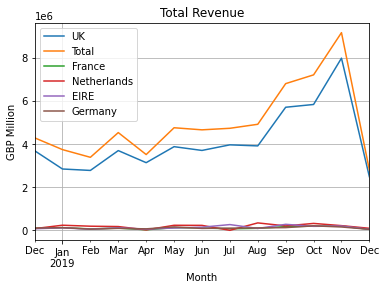

In [16]:
merged.plot()
plt.title('Total Revenue')
plt.ylabel('GBP Million')
plt.xlabel('Month')
plt.grid(True)

#### To avoid above's distorssion I created a chart combining the TOP5 except UK. In my opinion this chart is tremendously insightful because not only is showing the trend of the countries very neatly but also is showing an alarming outlier in the Netherlands where we can see that in JUL there were 0 sales. At the same time we observe that April is a particularly poor month in terms of performance for those countries. With that said, we can escalate the findings and stablish remediation accordingly

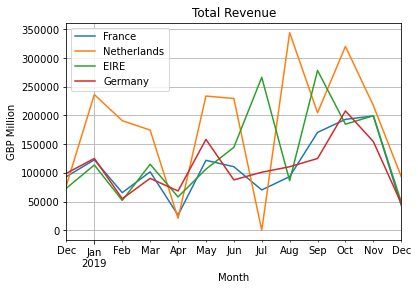

In [17]:
Top5_exUK.plot()
plt.title('Total Revenue')
plt.ylabel('GBP Million')
plt.xlabel('Month')
plt.grid(True)

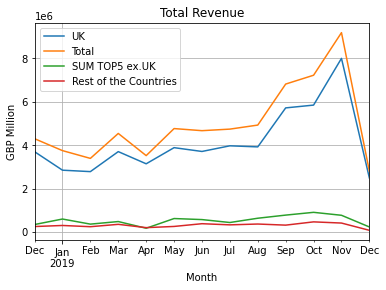

In [18]:
uk_top5_rest_total.plot()
plt.title('Total Revenue')
plt.ylabel('GBP Million')
plt.xlabel('Month')
plt.grid(True)

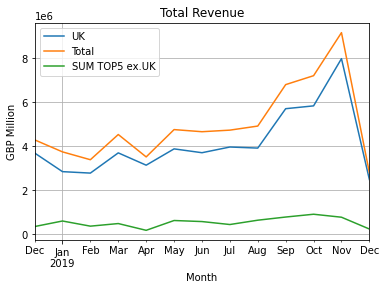

In [19]:
uk_top5_total.plot()
plt.title('Total Revenue')
plt.ylabel('GBP Million')
plt.xlabel('Month')
plt.grid(True)

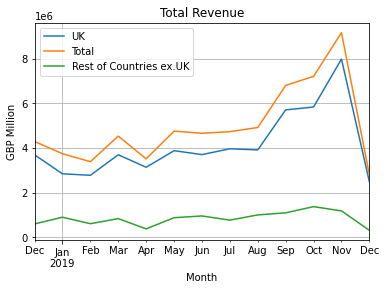

In [20]:
Total_uk_restcountries.plot()
plt.title('Total Revenue')
plt.ylabel('GBP Million')
plt.xlabel('Month')
plt.grid(True)

#### Quarterly revenue. I manually found 42094 in the index it was the first day of business in 2019 <span style='color:Blue'> There must be a more intuitive way to find the first day we did business in 2019 I tried df.loc[df['Date']=='2019-01-01':,:] and did not work. I believe this may have something to do with the dtype of Date column  </span

#### Why we want to have a dataset starting from the earliest point in 2019? Simple, if we don't do it, the quarterly chart below will compute 2018 Dec and 2019 Dec  numbers  in Q4. double counting 

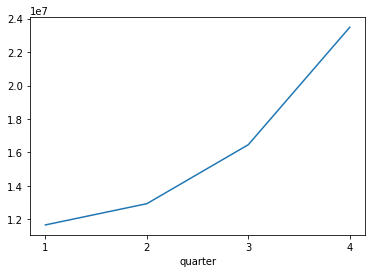

In [21]:
quarter_purchases = df.iloc[42094:,:]
quarter_purchases = df.groupby('quarter')['Revenue'].sum()
quarter_purchases.plot()
xticks=df['quarter'].unique()
plt.xticks(xticks);

In [22]:
display(quarter_purchases,df.iloc[42094:,12].value_counts(ascending=True))

quarter
1    11670336.84
2    12939609.25
3    16464002.49
4    23482091.32
Name: Revenue, dtype: float64

1     98476
2    102484
3    123743
4    169553
Name: quarter, dtype: int64

In [23]:
quarter_purchases_df = df.iloc[42094:,:]
country_list_quarter = quarter_purchases_df.groupby(['quarter','Country'])['Revenue'].sum().sort_values(ascending=False)
country_list_quarter= pd.DataFrame(country_list_quarter)
country_list_quarter =country_list_quarter.reset_index()
uk_quarter = country_list_quarter[country_list_quarter['Country']=='United Kingdom']
uk_quarter = uk_quarter.set_index('quarter').sort_index()
France_quarter = country_list_quarter[country_list_quarter['Country']=='France']
France_quarter = France_quarter.set_index('quarter').sort_index()
Netherlands_quarter = country_list_quarter[country_list_quarter['Country']=='Netherlands']
Netherlands_quarter  = Netherlands_quarter.set_index('quarter').sort_index()
EIRE_quarter = country_list_quarter[country_list_quarter['Country']=='EIRE']
EIRE_quarter  = EIRE_quarter.set_index('quarter').sort_index()
Germany_quarter = country_list_quarter[country_list_quarter['Country']=='Germany']
Germany_quarter =Germany_quarter.set_index('quarter').sort_index()
display(country_list_quarter,uk_quarter,France_quarter,Netherlands_quarter,EIRE_quarter,Germany_quarter)

,quarter,Country,Revenue
0,4,United Kingdom,16317777.16
1,3,United Kingdom,13596082.27
2,2,United Kingdom,10728738.65
3,1,United Kingdom,9324930.85
4,4,Netherlands,631288.28
...,...,...,...
115,4,Israel,1156.20
116,1,Canada,1046.04
117,1,Saudi Arabia,903.15
118,3,Hong Kong,660.23


,Country,Revenue
quarter,,
1,United Kingdom,9324930.85
2,United Kingdom,10728738.65
3,United Kingdom,13596082.27
4,United Kingdom,16317777.16


,Country,Revenue
quarter,,
1,France,290424.37
2,France,259326.43
3,France,334548.81
4,France,436015.34


,Country,Revenue
quarter,,
1,Netherlands,602130.58
2,Netherlands,484479.04
3,Netherlands,549214.75
4,Netherlands,631288.28


,Country,Revenue
quarter,,
1,EIRE,281081.67
2,EIRE,309435.36
3,EIRE,631205.52
4,EIRE,433793.07


,Country,Revenue
quarter,,
1,Germany,270853.81
2,Germany,314860.89
3,Germany,337118.99
4,Germany,409441.14


#### Found a more efficient way to plot different dataframes in the same chart than merging all the dataframes in one

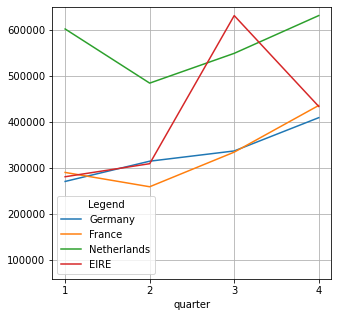

In [24]:
figure, ax = plt.subplots(figsize=(5,5))
Germany_quarter.plot(ax=ax)
France_quarter.plot(ax=ax)
Netherlands_quarter.plot(ax=ax)
EIRE_quarter.plot(ax=ax)
legend = plt.legend(['Germany','France','Netherlands','EIRE'], title = "Legend")
xticks=df['quarter'].unique()
plt.xticks(xticks)
minimum = France_quarter['Revenue'].min()-200000
plt.ylim(minimum)
plt.grid();

C:\Users\Usuario\AppData\Local\Temp/ipykernel_6768/2078650325.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);


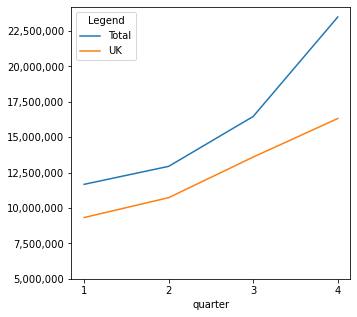

In [25]:
figure,ax =plt.subplots(figsize=(5,5))
quarter_purchases.plot(ax=ax)
uk_quarter.plot(ax=ax)
plt.legend(['Total','UK'],title='Legend')
xticks=df['quarter'].unique()
plt.xticks(xticks)
limit1 = 5000000
plt.ylim(limit1)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);


#### This is a rather failed attempt to capture volatility within the global dataset. Not even using a rolling average period of 30 days I got to normalize or smooth out the volatility

#### Germany chart is not behaving as wanted, the index is messed up

<AxesSubplot:>

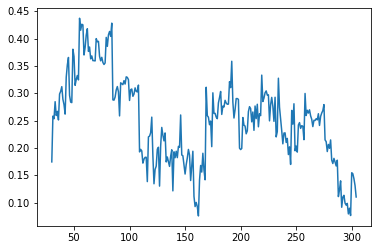

In [26]:
dates_revenue = df.groupby('Date',as_index=False)['Revenue'].sum()
dates_revenue['shift_column']=dates_revenue['Revenue'].shift()
dates_revenue['difference daily'] = dates_revenue['Revenue']/dates_revenue['shift_column']-1
dates_revenue['mean average'] = dates_revenue['difference daily'].rolling(30).mean()

dates_revenue['mean average'].plot()



<AxesSubplot:>

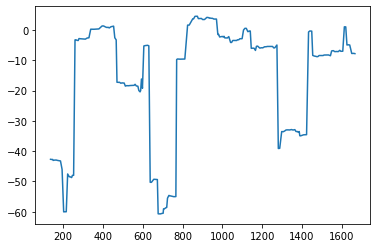

In [27]:
Volatility_Germany= df.groupby(['Date','Country'],as_index=False)['Revenue'].sum().reset_index()

Volatility_Germany = Volatility_Germany.loc[Volatility_Germany['Country']=='Germany',:]
Volatility_Germany['shift_column']=Volatility_Germany['Revenue'].shift()
Volatility_Germany['difference daily'] = Volatility_Germany['Revenue']/Volatility_Germany['shift_column'] -1
Volatility_Germany['mean average'] = Volatility_Germany['difference daily'].rolling(20).mean()
Volatility_Germany['mean average'].plot()



<span style='color:Blue'> This is the average revenue. This refers to the amount of money earned per individual unit or user. The average revenue is the total revenue amount divided by the quantity. I need to find a more efficient way to find out average revenue for each individual country  </span>

In [115]:
average_revenue_all_transactions = df['Revenue'].sum()/df['Quantity'].sum()
average_revenue_all_transactions
UK_df = df[df['Country']=='United Kingdom']
UK_av_rev = UK_df['Revenue'].sum()/UK_df['Quantity'].sum()
average_revenue_all_transactions,UK_av_rev


(12.134042004104325, 12.169181799607284)

## Product Analysis

#### Unintentionally I created a tool whereby the company has access rapidly to the different prices any given product has been sold within the time provided in the data. Below, for example , I entered the product number 23272 and the output tells us the name of the product and the different prices at which it has been sold. In my opinion this is a good finding that should have been discovered in the data exploratory analysis. In short, the prices of the dataset for each product are not static but can change 1. time with more demand, price goes up or vice versa or 2 scenario different price for different countries.

#### This tool is quite powerful in my opinion because the company most likely uses excel for this incumbencies which would not be efficient at  all considering how large the data may become. With this tool anyone could have access to the previously mentioned info just by entering the ProductNo without needing to mess around with the data filter feature in Excel.

In [201]:
ProductNoName= df['ProductNo'] + ' ' + df['ProductName'] + ' ' + df['Price'].astype(str) + ' ' + df['Country']

In [202]:
ProductNoName = ProductNoName.drop_duplicates()
ProductNoName = ProductNoName.reset_index(drop=True)
ProductNoName.head(3)
ProductNoName.where(lambda x: x.str.contains('23272')).unique()

array([nan,
       '23272 Tree T-Light Holder Willie Winkie 11.94 United Kingdom',
       '23272 Tree T-Light Holder Willie Winkie 11.94 Germany',
       '23272 Tree T-Light Holder Willie Winkie 11.94 Portugal',
       '23272 Tree T-Light Holder Willie Winkie 13.62 France',
       '23272 Tree T-Light Holder Willie Winkie 13.62 United Kingdom',
       '23272 Tree T-Light Holder Willie Winkie 11.94 EIRE',
       '23272 Tree T-Light Holder Willie Winkie 10.65 United Kingdom'],
      dtype=object)

In [220]:
df['Price'].max(),df['Price'].min(), df['Price'].max()-df['Price'].min()

(675.99, 10.25, 665.74)

#### Due to the high number of products in this analysis we will proceed with the TOP 5 Products sold and we will create some tiers which will be based on the price. The key question we are facing now is what exact criteria we should follow for the different price ranges in the tiers. Is it best to divide them into 4 equally distributed Tiers e.g. <168 Tier4  168 -337 Tier 3 and so on? The most intelligent approach in my opinion is to plot a histogram and then make a decision accordingly 

#### We need to know all the prices our company offers for each item of our product portfolio considering also prices that might be the same e.g. 12.5 but are prices for different products.

<AxesSubplot:>

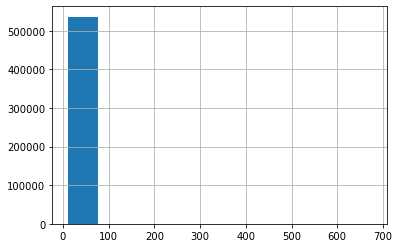

In [221]:
df['Price'].hist()

In [243]:
columns=['ProductName','Price']
price_product=df.loc[:,columns]
price_product.drop_duplicates(subset=['ProductName','Price'],inplace=True)
price_product

,ProductName,Price
0,Advent Calendar Gingham Sack,16.35
1,Place Setting White Heart,10.68
2,Christmas Toilet Roll,11.53
3,Christmas Lights 10 Reindeer,18.96
4,Retro Coffee Mugs Assorted,11.53
...,...,...
535150,Paper Craft Little Birdie,12.38
535347,Forked Cactus Candle,11.53
535618,Ribbon Reel Snowy Village,17.94
536293,Ivory Pendant Triple Shell Necklace,15.35


array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

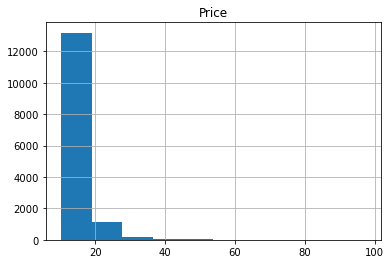

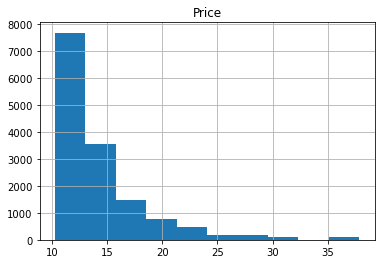

In [257]:
price_product[price_product['Price']<100].hist()
price_product[price_product['Price']<40].hist()

In [270]:
def mapping_the_tiers(x):
    if x <= 12:
        return('Tier 4')
    elif x > 12 and x < 17:
        return('Tier 3')
    elif x >17 and x < 30:
        return('Tier 2')
    else:
        return('Tier 1')
    
df['Tier'] = df['Price'].map(mapping_the_tiers)
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country,month,month_year,week,quarter,Cancellation,Region,Tier
0,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,-65.40,12472.0,Germany,12,2018-12,2018-11-26/2018-12-02,4,1,EMEA,Tier 3
1,536522,2018-12-01,22151,Place Setting White Heart,10.68,1,10.68,15012.0,United Kingdom,12,2018-12,2018-11-26/2018-12-02,4,0,UK,Tier 4
2,536522,2018-12-01,21098,Christmas Toilet Roll,11.53,2,23.06,15012.0,United Kingdom,12,2018-12,2018-11-26/2018-12-02,4,0,UK,Tier 4
3,536522,2018-12-01,22941,Christmas Lights 10 Reindeer,18.96,1,18.96,15012.0,United Kingdom,12,2018-12,2018-11-26/2018-12-02,4,0,UK,Tier 2
4,536522,2018-12-01,37370,Retro Coffee Mugs Assorted,11.53,2,23.06,15012.0,United Kingdom,12,2018-12,2018-11-26/2018-12-02,4,0,UK,Tier 4


#### Find below what it might probably be the most insightful information I draw from this data set, yet very simple process. Various groupby combining three dimensions time, product, revenue; region,product, revenue

C:\Users\Usuario\AppData\Local\Temp/ipykernel_6768/2149956239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only2019quarter['Tier'] = only2019quarter['Price'].map(mapping_the_tiers)


<AxesSubplot:ylabel='Revenue'>

Tier
Tier 1      220642.82
Tier 2     3146856.91
Tier 3    20014757.11
Tier 4    36879811.87
Name: Revenue, dtype: float64

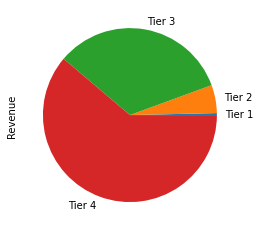

In [277]:
only2019quarter = df.iloc[42094:,:]
only2019quarter['Tier'] = only2019quarter['Price'].map(mapping_the_tiers)   
Tier_Revenue = only2019quarter.groupby('Tier')['Revenue'].sum()
display(Tier_Revenue.plot.pie(),Tier_Revenue)

In [282]:
Quarter_Tier_Revenue = only2019quarter.groupby(['quarter','Tier'])['Revenue'].sum()
Quarter_Tier_Revenue 

quarter  Tier  
1        Tier 1       47974.11
         Tier 2      673702.20
         Tier 3     3524314.46
         Tier 4     7424346.07
2        Tier 1       81328.33
         Tier 2      690376.62
         Tier 3     4063937.84
         Tier 4     8103966.46
3        Tier 1       41496.80
         Tier 2      728180.11
         Tier 3     5422064.42
         Tier 4    10272261.16
4        Tier 1       49843.58
         Tier 2     1054597.98
         Tier 3     7004440.39
         Tier 4    11079238.18
Name: Revenue, dtype: float64

In [284]:
Monthly_Tier_Revenue = only2019quarter.groupby(['month','Tier'])['Revenue'].sum()
Monthly_Tier_Revenue

month  Tier  
1      Tier 1      14181.99
       Tier 2     225967.67
       Tier 3    1224545.70
       Tier 4    2281033.99
2      Tier 1      12102.53
       Tier 2     179379.61
       Tier 3     998418.33
       Tier 4    2198600.74
3      Tier 1      21689.59
       Tier 2     268354.92
       Tier 3    1301350.43
       Tier 4    2944711.34
4      Tier 1      11632.23
       Tier 2     166012.45
       Tier 3     977217.96
       Tier 4    2361266.94
5      Tier 1      13486.44
       Tier 2     288507.56
       Tier 3    1571309.72
       Tier 4    2886692.02
6      Tier 1      56209.66
       Tier 2     235856.61
       Tier 3    1515410.16
       Tier 4    2856007.50
7      Tier 1      17896.16
       Tier 2     230464.58
       Tier 3    1432779.61
       Tier 4    3054049.05
8      Tier 1      12003.55
       Tier 2     208678.26
       Tier 3    1558390.20
       Tier 4    3141905.08
9      Tier 1      11597.09
       Tier 2     289037.27
       Tier 3    2430894.61
      

In [291]:
Region_Tier_Revenue = only2019quarter.groupby(['Region','Tier'])['Revenue'].sum()
Region_Tier_Revenue


Region                Tier  
APAC                  Tier 1         353.64
                      Tier 2       10554.69
                      Tier 3      107111.56
                      Tier 4      222092.64
America               Tier 1          71.66
                      Tier 2        2827.23
                      Tier 3       14225.98
                      Tier 4       39026.46
EMEA                  Tier 1        9766.90
                      Tier 2      365512.93
                      Tier 3     2529418.61
                      Tier 4     5763643.39
Middle East & Others  Tier 1         664.24
                      Tier 2       47236.47
                      Tier 3      388602.21
                      Tier 4      793431.17
UK                    Tier 1      209786.38
                      Tier 2     2720725.59
                      Tier 3    16975398.75
                      Tier 4    30061618.21
Name: Revenue, dtype: float64

In [293]:
Uk_summary = only2019quarter[only2019quarter['Country']=='United Kingdom']
Uk_summary = Uk_summary.groupby(['Country','quarter','Tier'])['Revenue'].sum()
Uk_summary

Country         quarter  Tier  
United Kingdom  1        Tier 1      44956.74
                         Tier 2     559722.73
                         Tier 3    2888950.86
                         Tier 4    5831300.52
                2        Tier 1      80071.96
                         Tier 2     597935.64
                         Tier 3    3439297.30
                         Tier 4    6611433.75
                3        Tier 1      38079.85
                         Tier 2     616835.09
                         Tier 3    4609233.96
                         Tier 4    8331933.37
                4        Tier 1      46677.83
                         Tier 2     946232.13
                         Tier 3    6037916.63
                         Tier 4    9286950.57
Name: Revenue, dtype: float64

#### To be continued... ad-hoc requests, cancellations investigation (why some cancellations' customer numberwas missing), visual demonstrations of the extremely powerful groupbies at the end

#### If you want to know more about me https://www.linkedin.com/in/alejandro-poza-del-cerro/